# Modely konkurence populací


```{index} single: Model ; konkurence populací
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

```{margin} Autonomní systém v rovině

[![](https://user.mendelu.cz/marik/manim/thumbs/AS_vlastni_cisla.jpg)](https://user.mendelu.cz/marik/manim/AS_vlastni_cisla/)

Dvourozměrné autonomní systémy můžeme analyzovat metodami založenými na klasifikaci stacionárních bodů. Typ stacionárního bodu (uzel, ohnisko, ...) a jeho stabilitu poznáme u lineárního systému z vlastních čísel matice, u nelineárního z vlastních čísel Jacobiho matice.

```


## Konkurence dvou populací

Předpokládejme, že v jisté izolované oblasti jsou přítomny dva
živočišné druhy, které si vzájemně konkurují. Předpokládejme dále, že
konkurence ovlivní rychlost růstu daného druhu tak, že zpomalení
rychlosti růstu je přímo úměrné četnosti, s níž se jedinci jednoho
druhu setkávají s jedinci druhého druhu. Nepředpokládáme přitom nic
bližšího o typu této konkurence, tj. zda jedinci jednoho druhu fyzicky
brání jedincům druhého druhu v přístupu k potravě, či zda je konkurence
založena jenom na tom, že "ujídají ze společného krajíce".  Náš
model bude zahrnovat oba typy konkurence, změna se projeví pouze ve
velikosti konstanty úměrnosti, která vyjadřuje zpomalení vývoje
populací vlivem konkurence. 


### Matematický model



```{margin} Model konkurence

[![](https://user.mendelu.cz/marik/manim/thumbs/Konkurence_druhu.jpg)](https://user.mendelu.cz/marik/manim/Konkurence_druhu/)

Model konkurence dvou druhů je jedním ze základních modelů usnadňujících chápání dynamiky živočišných a rostlinných společenstev.

```


Je-li velikost první populace vyjádřena veličinou $x$ a velikost druhé
populace veličinou $y$, je možno systém popsat soustavou
diferenciálních rovnic
$$
\begin{aligned}
\frac{\mathrm dx}{\mathrm dt}={}&(a-bx)x-cxy,\\
\frac{\mathrm dy}{\mathrm dt}={}&(\alpha-\beta y)y-\gamma xy,
\end{aligned}
$$
kde všechno kromě $x$,$y$ jsou kladné reálné parametry.

Prozkoumejme strukturu tohoto systému.  První členy na pravých stranách soustavy
odpovídají logistickému růstu populace, pokud se tato populace nachází v
prostředí osamocena.  Druhé členy obsahují velikosti obou populací a odpovídají
zpomalení růstu vlivem mezidruhové konkurence.
 
Frekvence setkávání jedinců populace $x$ s jedinci populace $y$ je úměrná
součinu velikostí těchto populací $xy$ a zpomalení růstu populace $x$ vlivem
těchto setkání je úměrné tomuto součinu s konstantou úměrnosti $c$. Parametr $c$
tedy reprezentuje sílu konkurence, tj. jaký vliv má vzájemná konkurence na růst
populace $x$. Vliv populace $x$ na růst populace $y$ je dán parametrem $\gamma$,
který obecně může být různý od $c$.

Prozkoumejme ještě možná jednodruhová podspolečenstva.  Pro $y=0$ je přítomna
pouze populace $x$. První rovnice pak představuje logistickou rovnici pro vývoj
populace $x$. Nosná kapacita prostředí je $\frac ab$. 

Podobně, je-li $x=0$, představuje druhá rovnice v soustavě logistickou rovnici
pro růst populace $y$ s nosnou kapacitou prostředí $\frac \alpha\beta$. 

Řešení pro konkrétní sadu parametrů a konkrétní sadu počátečních podmínek najdeme stejně snadno, jako řešení jedné diferenciální rovnice. Vykreslíme si pro srovnání čárkovaně do stejného grafu i dynamiku samostatných jednodruhových populací.

In [2]:
def konkurence(t,X,a=1,b=1,c=0.4,alpha=1,beta=.2,gamma=1):
    x,y = X
    return [(a-b*x-c*y)*x, (alpha-beta*x-gamma*y)*y]

meze = [0,20]
pocatecni_podminka = [0.1,0.5]
t = np.linspace(*meze,500)

df = pd.DataFrame(index=t)
df.index.name ="čas"

for c,beta,sloupce in zip( [0.4,0] , [0.2, 0] , [["x","y"],["x0","y0"]]):
    df[sloupce] = solve_ivp(
                       lambda t,X:konkurence(t,X,c=c,beta=beta),
                       meze,
                       pocatecni_podminka,
                       t_eval=t
                       ).y.T
df.head()

,x,y,x0,y0
čas,,,,
0.000000,0.100000,0.500000,0.100000,0.500000
0.040080,0.102832,0.509608,0.103665,0.510019
0.080160,0.105715,0.519190,0.107449,0.520029
0.120240,0.108650,0.528736,0.111354,0.530024
0.160321,0.111636,0.538241,0.115380,0.539996


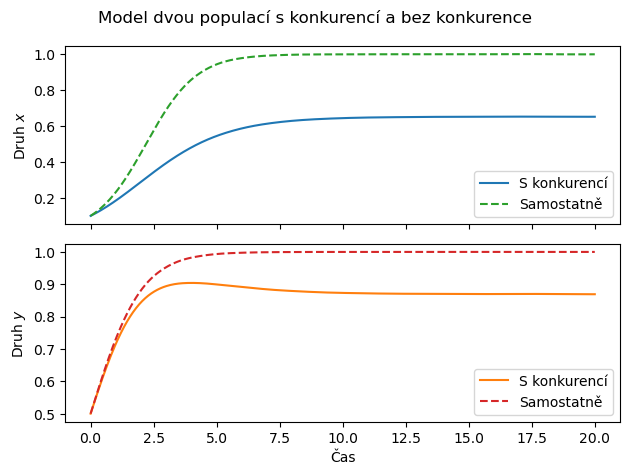

In [3]:
ax = df.plot(
    subplots=[("x","x0"),("y","y0")],
    legend=False,
    style=["-","-","--","--"]
)
ax[0].set(
    ylabel="Druh $x$",
)
ax[1].set(
    xlabel="Čas",
    ylabel="Druh $y$",
)

ax[0].legend(["S konkurencí", "Samostatně"])
ax[1].legend(["S konkurencí", "Samostatně"])
plt.suptitle("Model dvou populací s konkurencí a bez konkurence")
plt.tight_layout();

Pro prezentaci tabulky nebo export do Excelu je výhodnější použít hierarchické názvy sloupců.

In [4]:
sloupce = pd.MultiIndex.from_arrays(
[
    2*["s konkurencí"] + 2*["bez konkurence"],
    2*["druh x","druh y"]
])
df.columns = sloupce
df

s konkurencí           bez konkurence          
                druh x    druh y         druh x    druh y
čas                                                      
0.000000      0.100000  0.500000       0.100000  0.500000
0.040080      0.102832  0.509608       0.103665  0.510019
0.080160      0.105715  0.519190       0.107449  0.520029
0.120240      0.108650  0.528736       0.111354  0.530024
0.160321      0.111636  0.538241       0.115380  0.539996
...                ...       ...            ...       ...
19.839679     0.651708  0.869091       0.999401  0.999931
19.879760     0.651725  0.869111       0.999424  0.999934
19.919840     0.651741  0.869129       0.999447  0.999937
19.959920     0.651756  0.869147       0.999469  0.999939
20.000000     0.651771  0.869164       0.999490  0.999942

[500 rows x 4 columns]

### Fázový portrét

Prozkoumáme fázový portrét. Řešení tedy budeme uvažovat jako paametrické křivky
v rovině, kde na každé ose je velikost jedné z populací.

Pro nalezení nulklin přepíšeme soustavu do tvaru
$$ 
\begin{aligned}
\frac{\mathrm dx}{\mathrm dt}={}&(a-bx-cy)x,\\
\frac{\mathrm dy}{\mathrm dt}={}&(\alpha-\beta y-\gamma x)y.
\end{aligned}
$$

Systém má dvě $x$-nulkliny
$$
\begin{aligned}
  &n_{1x}:\quad x=0,\\
  &n_{2x}:\quad a-bx-cy=0,
\end{aligned}
$$
a dvě $y$-nulkliny
$$
\begin{aligned}
 &n_{1y}:\quad y=0,\\
 &n_{2y}:\quad \alpha-\beta x-\gamma y=0.
\end{aligned}
$$
V průsečících $x$-nulklin a $y$-nulklinami nalezneme stacionární body systému.

Nulklina $n_{2x}$ je přímka procházející body $\left[0,\frac ac\right]$ a
$\left[\frac ab, 0\right]$. Nulklina $n_{2y}$ je přímka procházející body
$\left[\frac \alpha\gamma,0\right]$ a $\left[0,\frac \alpha\beta\right]$. Podle
vzájemné polohy těchto bodů ma osách $x$ a $y$ jsou možné čtyři kvalitativně
odlišné případy znázorněné na obrázcích. Zeleně jsou znázorněny $x$-nulkliny a
červeně $y$-nulkliny. Stacionární body jsou v průsečíku nulklin různých barev.

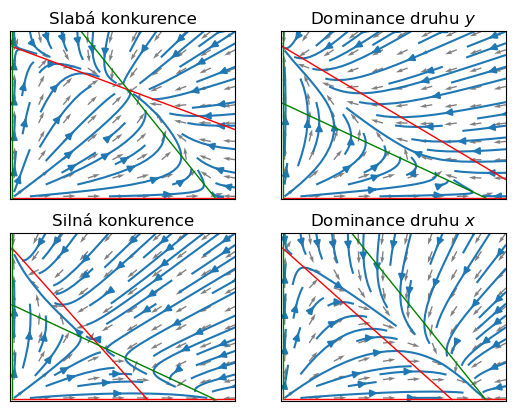

In [5]:
xmax, ymax = 1.1,1.1
fig,axs_square = plt.subplots(2,2)
axs = axs_square.ravel()

for i,data in enumerate([
                        [1,1,0.6,1,0.5,1],
                        [1,1,1.6,1,0.8,1],
                        [1,1,1.6,1,1.5,1],
                        [1,1,0.6,1,1.2,1],
                    ]):
    a,b,c,alpha,beta,gamma = data
    ax = axs[i]

    def konkurence(t,X):
        x,y = X
        return [(a-b*x-c*y)*x, (alpha-beta*x-gamma*y)*y]

    # Body pro kresleni
    x, y = np.meshgrid(np.linspace(0.01, xmax, 10), 
                       np.linspace(0.01, ymax, 10))

    # Komponenty vektoroveho pole
    u,v = konkurence(0,[x,y])
    M = np.sqrt(u**2+v**2) # velikost vektoru

    ax.quiver(x,y,u/M,v/M,color='gray',units='xy', angles='xy') # vykresleni s jednotkovou delkou
    ax.streamplot(x, y, u, v, density=0.5)
    #ax.set_aspect(.5) # stejne meritko na obou osach

    ax.plot([0,xmax],[0,0],color="r",lw=1)
    ax.plot([alpha/beta,0],[0,alpha/gamma],color="r",lw=1)

    ax.plot([0,0],[0,ymax],color="g",lw=1)
    ax.plot([0,a/b],[a/c,0],color="g",lw=1)

    ax.set(
        xlim=(-0.01,xmax),
        ylim=(-0.01,ymax)
    )
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

axs[0].set(title="Slabá konkurence")
axs[1].set(title=r"Dominance druhu $y$")
axs[2].set(title="Silná konkurence")
axs[3].set(title=r"Dominance druhu $x$");

### Analýza stacionárních bodů

Prozkoumáme chování trajektorií v okolí stacionárních bodů. 

Jacobiho matice systému je
$$J(x,y)= \begin{pmatrix}
 a-2bx-cy&-cx\\ 
 -\gamma y&\alpha-2\beta y-\gamma x
 \end{pmatrix}.$$

Označme specifické míry růstu populací (per capita) $m(x,y)=a-bx-cy$ a
$\mu(x,y)=\alpha-\beta y-\gamma x$.

#### Stacionární bod v počátku 

Průsečíkem nulklin $n_{1x}$ a $n_{1y}$ je stacionární bod $S_1=[0,0]$. Tento bod
odpovídá stavu, kdy v prostředí není přítomna žádná z populací $x,y$.
Pronikne-li do takového prostředí malé množství jedinců populace $x$, začnou
se množit rychlostí $m(0,0)=a$. Invazní parametr je tedy kladný a populace se
uchytí. Podobně invazní parametr populace $y$ je $\mu(0,0)=\alpha>0$ a i
populace $y$ se v prostředí uchytí a začne množit. Jacobiho matice v bodě
$S_1$ je $$ J(0,0)=\begin{pmatrix}a&0\\0&\alpha \end{pmatrix} $$ a protože
$\det J(0,0)=\alpha a>0$ a $\mathop{\mathrm {Tr}} J(0,0)=a+\alpha$, je v bodě
$S_1$ nestabilní uzel nebo nestabilní ohnisko. Vzhledem k tomu, že žádná
trajektorie nemůže vystoupit z prvního kvadrantu (vysvětlete proč!), jedná se
o nestabilní uzel.

#### Stacionární body na osách

Průsečíkem nulklin $n_{1x}$ a $n_{2y}$ je stacionární bod $S_2=[0,\frac
\alpha\beta]$. Tento stav odpovídá tomu, že populace $x$ se v prostředí
nevyskytuje a velikost populace $y$ je ustálena na hodnotě nosné
kapacity prostředí. Jakákoliv náhodná změna populace $y$ vede k tomu, že
se systém vrátí opět do tohoto stacionárního bodu, jak víme ze studia
logistické rovnice. Prozkoumejme, jak se systém chová při malých
náhodných změnách populace $x$. Invazní parametr této populace do stavu
$S_2$ je
$m\left(0,\frac \alpha\beta\right)=a-c\frac \alpha\beta=c\left(\frac ac-\frac
\alpha\beta \right)$. Tento výraz je kladný pokud

$$ 
\frac ac>\frac \alpha\beta,
$$(eq:1)

tj. pokud parametr $c$, charakterizující sílu mezidruhové konkurence, je dostatečně
malý. V tomto případě se populace $x$ uchytí a začne množit. Platí-li opačná nerovnost, bude invazní parametr populace $x$
záporný, populace bude vymírat a systém bude dospívat zpět do
stacionárního stavu $S_2$. Jacobiho matice v bodě $S_2$ je

$$J\left(0,\frac \alpha\beta\right)=
  \begin{pmatrix}
a-c\frac \alpha\beta&0\\
\gamma\frac\alpha\beta&-\alpha
\end{pmatrix}
$$

a protože $\det J(0,\frac\alpha\beta)=-ac\left(\frac
ac-\frac\alpha\beta\right)$, je v bodě $S_2$ sedlo, jestliže platí  {eq}`eq:1`
a uzel nebo ohnisko jinak. Vzhledem k tomu, že trajektorie nemůže
protnout osu $y$ (proč?), nejedná se o ohnisko. Vzhledem k tvaru
směrového pole se tedy jedná sedlo nebo o stabilní uzel, podle toho, zda
je splněna podmínka  {eq}`eq:1` či nikoliv.

#### Stacionární bod uvnitř prvního kvadrantu

Průsečíkem nulklin $n_{2x}$ a $n_{1y}$ je stacionární bod $S_3=[\frac ab,0]$.
Situace je analogická jako u stacionárního bodu $S_2$, pouze jsou vyměněny
role populací $x$ a $y$. Systém tedy v nepřítomnosti populace $y$ dospěje do
stavu, kdy populace $x$ se ustálí na hodnotě nosné kapacity prostředí, invazní
parametr populace $y$ do tohoto stavu je $\mu(\frac ab,0)=\gamma\left (\frac
\alpha\gamma-\frac ac\right)$ a je kladný pokud

$$
\frac\alpha\gamma>\frac ab
$$ (eq:2)

a záporný jinak. Bod $S_3$ je sedlo, pokud uvedená podmínka platí a
stabilní uzel jinak.

Průsečík nulklin $n_{2x}$ a $n_{2y}$ získáme řešením soustavy rovnic

$$
\begin{aligned}
a-bx-cy&{}=0,\\ \alpha-\beta y-\gamma x&{}=0.
\end{aligned}
$$ (eq:nulkl1)

Toto lze provést numericky, přímým řešením, nebo graficky. Zajímáme se přitom
pouze o řešení, které se nachází v prvním kvadrantu, tj. jehož obě složky jsou
nezáporné. Z náčrtů je patrné, že přímky odpovídající těmto nulklinám se protnou
v prvním kvadrantu právě tehdy, když buď platí obě z nerovností {eq}`eq:1`,
{eq}`eq:2`, nebo ani jedna. Označme průsečík nulklin $S_4=(x^*, y^*)$. I když
hodnoty $x^*,y^*$ je možno explicitně vypočítat, uvidíme, že jejich znalost
nebude pro vyšetřování typu stacionárního bodu důležitá. Jacobiho matice v bodě
$S_4$ je

$$
J(x^*,y^*)=
\begin{pmatrix}
a-2bx^*-cy^*&-cx^*\\
-\gamma y^*&\alpha-2\beta y^*-\gamma x^*
\end{pmatrix}.
$$

Vzhledem k tomu, že $(x^*, y^*)$ jsou řešením  {eq}`eq:nulkl1`, platí
$$
\begin{aligned}
a-bx^*-cy^*&{}=0,\\ \alpha-\beta y^*-\gamma x^*&{}=0
\end{aligned}
$$
a proto

$$
J(x^*,y^*)=
\begin{pmatrix}
-bx^*&-cx^*\\
-\gamma y^*&-\beta y^*
\end{pmatrix}.
$$

Stopa Jacobiho matice je vždy záporná. Determinant Jacobiho matice je

$$
\det J(x^*,y^*)=b\beta x^*y^*-c\gamma x^*y^*=x^*y^*(b\beta-c\gamma).
$$
Pokud platí  {eq}`eq:1` a  {eq}`eq:2`, pak
$$
b\beta>\frac{\alpha c}a \frac{a\gamma}\alpha=c\gamma,
$$
determinant Jacobiho matice je kladný a bod $S_4$ je ohnisko nebo uzel. Vzhledem
k tvaru směrového pole se nemůže jednat o ohnisko a bod je tedy stabilní uzel.
Pokud neplatí ani jedna z nerovností  {eq}`eq:1`, {eq}`eq:2`, je determinant
Jacobiho matice naopak záporný a v bodě $S_4$ je sedlo.

#### Shrnutí

* Platí-li obě z nerovností  {eq}`eq:1`,  {eq}`eq:2`, leží uvnitř prvního
  kvadrantu singulární bod, který je stabilním uzlem. Všechny trajektorie ležící
  v prvním kvadrantu konvergují do tohoto bodu pro $t\to\infty$. Systém tedy vždy
  dospěje do stavu, kdy přežívají obě populace. Podmínky  {eq}`eq:1` a {eq}`eq:2`
  jsou splněny, pokud jsou parametry $c,\gamma$, které charakterizují
  mezidruhovou konkurenci, dostatečně malé. Proto tento stav budeme nazývat
  *slabou konkurencí*. 
* Platí-li  {eq}`eq:1` a neplatí-li  {eq}`eq:2` nemá systém uvnitř prvního
  kvadrantu singulární bod a všechny trajektorie ležící uvnitř tohoto kvadrantu
  konvergují pro $t\to\infty$ do stacionárního bodu $[\frac ab,0]$. V systému
  tedy dojde vlivem mezidruhové konkurence k vyloučení druhu $y$  a populace
  druhu $x$ se ustálí na hodnotě, odpovídající jeho nosné kapacitě prostředí.
  Tento stav budeme nazývat *dominancí druhu $x$*.
* Platí-li  {eq}`eq:2` a neplatí-li  {eq}`eq:1`, je situace
  podobná jako v předchozím bodě, pouze dochází ke konkurenčnímu
  vyloučení druhu $x$ a jedná se tedy o *dominanci druhu $y$*.
* Neplatí-li ani jedna z nerovností  {eq}`eq:1`,  {eq}`eq:2`, má systém uvnitř
  prvního kvadrantu singulární bod, který je sedlem a tedy pouze konečný počet
  trajektorií konverguje k tomuto bodu. Tento bod však nebude odpovídat reálnému
  stavu, ve kterém se může populace trvale nacházet, protože není odolný vůči
  náhodným perturbacím. Trajektorie, konvergující do tohoto sedlového bodu,
  rozdělí první kvadrant na dvě množiny, které tvoří oblasti atraktivity
  jednotlivých stabilních stacionárních bodů. Všechny trajektorie tedy směřují
  pro $t\to\infty$ buď do stacionárního bodu $[\frac ab,0]$, nebo
  $[0,\frac\alpha\beta]$. V systému tedy vždy dojde ke konkurenčnímu vyloučení
  jednoho z druhů. Který z druhů bude vyloučen, záleží na počátečních podmínkách.
  Pokud jsou počáteční podmínky nastaveny tak, že trajektorie začíná v oblasti
  atraktivity stacionárního bodu $[\frac ab,0]$, dojde k eliminaci druhu $y$,
  pokud je tomu naopak, dojde k eliminaci druhu $x$. Nesplnění nerovností
  {eq}`eq:1`,  {eq}`eq:2` odpovídá tomu, že parametry mezidruhové konkurence jsou
  dostatečně velké, proto tento stav budeme nazývat *silnou konkurencí*.

Všechny typy konkurence (konkurenční vyloučení, slabá konkurence,
silná konkurence) jsou v přírodě pozorovány. V ekologii zpravidla
největší pozornost upoutává slabá konkurence, kdy dochází ke stabilní
koexistenci. Tento jev nastává, pokud, řečeno v biologických
termínech, jedinec daného druhu svou existencí konkuruje jedincům
svého druhu více, než jedincům druhu jiného. V praxi to znamená, že
druhy musí mít poněkud odlišné ekologické nároky (Gauseho
  princip). Například společně hnízdící druhy ptáků si konkurují v
boji o hnízdiště. Tyto druhy mohou koexistovat, pokud mají například
rozdílné složení potravy. V tomto případě jedinec konkuruje svému
druhu i v boji o prostor k hnízdění i v boji o potravu, jedincům
druhého druhu však konkuruje méně -- pouze v boji o hnízdiště.
Všimněme si ještě, že pokud vedle sebe koexistují dvě populace, součet
velikostí je větší než velikost rovnovážných stavů kterékoliv
osamocené populace. Dvě konkurující-si populace tedy využívají zdroje
efektivněji než populace jediná.

Lze ukázat, že ke konkurenčnímu vyloučení slabšího druhu nemusí dojít,
pokud druhy žijí v komplikovanějších podmínkách, než jaké jsme dosud
uvažovali: například v přítomnosti třetího konkurenta, v přítomnosti
predátora, v periodicky se měnícím životním prostředí, či pokud na
sebe druhy reagují se zpožděním, ve fragmentovaném prostředí, kdy
silnější druh neobsadí všechny fragmenty a zůstane tak volný prostor
pro slabší druh. 


## Model konkurence tří druhů

Podobný model, jako pro konkurenci dvou druhů, je možno sestavit i pro
konkurenci tří a více druhů. Matematický popis je v tomto případě
poněkud obtížnější, proto se omezíme na formulaci systému
diferenciálních rovnic a na některé výsledky.

Označíme-li velikost populace jednotlivých druhů veličinami $x,y,z$, je
možno model konkurence mezi těmito druhy zapsat ve tvaru
$$
\begin{aligned}
\frac{\mathrm dx}{\mathrm dt}={}&(a-bx-cy-dz)x,\\
\frac{\mathrm dy}{\mathrm dt}={}&(\alpha-\beta x-\gamma y-\delta z)y,\\
\frac{\mathrm dz}{\mathrm dt}={}&(m-nx-oy-pz)z,
\end{aligned}
$$
kde všechny veličiny kromě $x,y,z$ jsou kladné parametry.

Je-li v lokalitě přítomen pouze jeden druh (např. $x$), vyvíjí se
podle logistické rovnice a velikost populace se ustálí na hodnotě dané
úživností prostředí. O tom, zda do takového stavu mohou proniknout
druhy $z$ nebo $y$ a úspěšně se začít rozmnožovat rozhodují znaménka
invazních parametrů těchto populací v uvažovaném stacionárním bodě.
Například populace $y$ má ve stacionárním bodě $[\frac ab,0,0]$
invazní parametr $\alpha-\beta \frac ab-\gamma 0-\delta
0=\beta\left(\frac \alpha\beta-\frac ab\right)$ a populace $z$ má v
tomtéž bodě invazní parametr $n\left(\frac mn-\frac ab\right)$.

Není-li druh $z$ ve skutečnosti v dané lokalitě přítomen, je $z=0$ a
první dvě rovnice zcela odpovídají modelu konkurence mezi dvěma
populacemi $x$ a $y$. Podobně je možno studovat další dvojdruhová
společenství $x$,$z$ a $y$,$z$.  Pokud invazní parametr každého druhu,
který není ve společenstvu přítomen, do stavu reprezentovaného
stabilními stavy dalších dvou druhů, je kladný, systém je permanentní
a velikost všech populací se udrží na nenulové hodnotě. Tato podmínka
kladnosti všech invazních parametrů je však pouze dostatečná, nikoliv
nutná.

Numerickým řešením tohoto systému je možné ukázat, že při vhodném nastavení
parametrů mezidruhové konkurence existuje situace, kdy libovolné dvojdruhové
podspolečenství druhů $x$,$y$,$z$ není permanentní a dojde ke konkurenčnímu
vyloučení některého druhu a k obsazení dané lokality jediným druhem, zatímco v
přítomnosti nenulového stavu všech tří populací existuje ustálený stav,
charakterizující přežívání všech tří populací. V takovém případě se tedy,
poněkud paradoxně, kromě konkurence jedná i o jistý druh symbiózy. Je možné, že
pokud jeden z druhů náhodnými vlivy nebo neopatrným zásahem člověka vymře,
nemusí toto vymření vést k posílení populací jeho konkurentů, ale někteří z
konkurentů mohou vyhynout, zatímco jiní dominují.

In [6]:
meze = [0,200]
def konkurence_tri(t,X,
    a=1,b=1,c=0.4,d=1.4,
    alpha=1,beta=1.5,gamma=1,delta=0.5,
    m=1,n=0.7,o=1.2,p=1
    ):
    x,y,z = X
    return [
      (a-b*x-c*y-d*z)*x, 
      (alpha-beta*x-gamma*y-delta*z)*y,
      (m-n*x-o*y-p*z)*z
      ]

parametry = (1, 1,   0.4, 1.4,
             1, 1.5, 1,   0.5,
             1, 0.7, 1.2, 1  )

# Můžete vyzkoušet i tuto zajímavou sadu parametrů.
# parametry = (1, 1,   0.3, 1.6,
#               1, 1.8, 1,   0.2,
#               1, 0.3, 1.8, 1  )

pocatecni_podminky = [ [.2,.5,0.8],
                       [0,.5,0.8],
                     ]
t = np.linspace(*meze,400)

df = pd.DataFrame(index=t)
df.index.name = "čas"

for i,pocatecni_podminka in enumerate(pocatecni_podminky):
    df[[f"x{i}",f"y{i}",f"z{i}"]] = solve_ivp(
        lambda t,X:konkurence_tri(t,X,*parametry),
        meze,
        pocatecni_podminka,
        t_eval=t
        ).y.T
df.head()

,x0,y0,z0,x1,y1,z1
čas,,,,,,
0.000000,0.200000,0.500000,0.800000,0.0,0.500000,0.800000
0.501253,0.165744,0.472831,0.647708,0.0,0.530781,0.671043
1.002506,0.151107,0.471282,0.564768,0.0,0.569209,0.584107
1.503759,0.144729,0.480006,0.508911,0.0,0.609614,0.514373
2.005013,0.143258,0.493259,0.466966,0.0,0.650017,0.456115


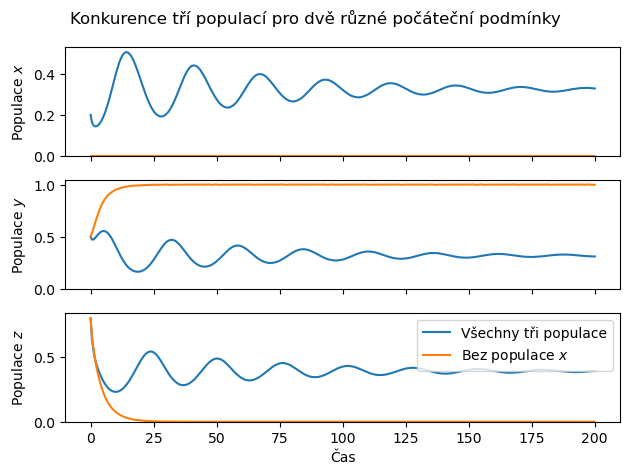

In [7]:
ax = df.plot(
    subplots=[("x0","x1"),("y0","y1"),("z0","z1")],
    #style=["-"]*3 + ["--"]*3,
    color=["C0"]*3+["C1"]*3,
    legend=False
    )
ax[2].legend(["Všechny tři populace","Bez populace $x$"])   
ax[0].set(ylabel="Populace $x$")
ax[1].set(ylabel="Populace $y$")
ax[2].set(ylabel="Populace $z$",xlabel="Čas")
for a in ax:
    a.set(ylim=(0,None))
plt.suptitle("Konkurence tří populací pro dvě různé počáteční podmínky");     
plt.tight_layout();     

Pro export dat může být výhodnější použít popisnější názvy pro sloupce a hierarchický index.

In [8]:
sloupce = pd.MultiIndex.from_arrays(
    [
        ["Počáteční podmínka 0"]*3+["Počáteční podmínka 1"]*3,
        ["Druh x","Druh y","Druh z"]*2
    ])  
tabulka = df.copy()
tabulka.columns = sloupce
tabulka

Počáteční podmínka 0                     Počáteční podmínka 1  \
                         Druh x    Druh y    Druh z               Druh x   
čas                                                                        
0.000000               0.200000  0.500000  0.800000                  0.0   
0.501253               0.165744  0.472831  0.647708                  0.0   
1.002506               0.151107  0.471282  0.564768                  0.0   
1.503759               0.144729  0.480006  0.508911                  0.0   
2.005013               0.143258  0.493259  0.466966                  0.0   
...                         ...       ...       ...                  ...   
197.994987             0.331982  0.310686  0.389897                  0.0   
198.496241             0.331542  0.310149  0.390817                  0.0   
198.997494             0.331030  0.309756  0.391773                  0.0   
199.498747             0.330415  0.309473  0.392701                  0.0   
200.000000             0.329714  0.309308  0.393595                  0.0   

                                    
              Druh y        Druh z  
čas                                 
0.000000    0.500000  8.000000e-01  
0.501253    0.530781  6.710428e-01  
1.002506    0.569209  5.841069e-01  
1.503759    0.609614  5.143729e-01  
2.005013    0.650017  4.561152e-01  
...              ...           ...  
197.994987  1.000651  3.121549e-18  
198.496241  0.999512  2.819905e-18  
198.997494  0.998449  2.547061e-18  
199.498747  0.998508  2.303830e-18  
200.000000  0.999096  2.085541e-18  

[400 rows x 6 columns]

Na obrázku je schematicky zachycena jedna z možných situací. V průmětnách jsou
zachyceny poměry pro jednotlivá dvojdruhová společenství. Odsud plyne, že v
případě dvojdruhového společenství $zy$ (červená rovina) dominuje druh $y$, v případě
společenství $xz$ (modrá rovina) dominuje druh $z$ a u společenství $xy$ (černá rovina) dominuje druh $x$. Na
osách jsou vyznačeny stacionární body charakterizující nosnou kapacitu prostředí
pro každou z populací, pokud je populace v prostředí sama. Průsečíky zaznačených
přímek s osou $x$ jsou (v pořadí od počátku) $\frac \alpha\beta$, $\frac ab$ a
$\frac mn$, s osou $y$ $\frac mo$, $\frac \alpha\gamma$ a $\frac ac$ a s osou
$z$ body $\frac ad$, $\frac mp$ a $\frac \alpha\delta$.

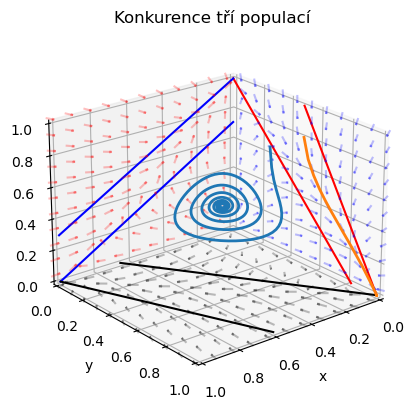

In [9]:
a,b,c,d,alpha,beta,gamma,delta,m,n,o,p = parametry

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.view_init(22, 51)

body = np.array([
    [0,alpha/gamma,0,0,(alpha-delta)/gamma,1],
    [0,m/o,0,0,0,m/p],
    [b/a,0,0,0,0,a/d],
    [1,0,(m-n)/p,0,0,m/p],
    [b/a,0,0,(a-c)/b,1,0],
    [alpha/beta,0,0,0,alpha/gamma,0]
])
barvy = ["red","red","blue","blue","black","black"]
for bod,barva in zip(body, barvy):
    ax.plot3D([bod[0],bod[3]], [bod[1],bod[4]], [bod[2],bod[5]], color=barva)

ax.set_title('Konkurence tří populací')
ax.set(
    xlabel="x",
    ylabel="y",
    zlabel="z",
    xlim=(0,1),
    ylim=(0,1),
    zlim=(0,1),
)

# Make the grid
x, y, z = np.meshgrid(np.arange(0.05, 1.1, 0.1),
                      np.arange(0.05, 1.1, 0.1),
                      np.array([0]))
u, v, w = (a-b*x-c*y-d*z)*x, (alpha-beta*x-gamma*y-delta*z)*y,(m-n*x-o*y-p*z)*z
ax.quiver(x, y, z, u, v, w, length=0.05, normalize=True, color="black", alpha=0.25)

x, y, z = z, x, y
u, v, w = (a-b*x-c*y-d*z)*x, (alpha-beta*x-gamma*y-delta*z)*y,(m-n*x-o*y-p*z)*z
ax.quiver(x, y, z, u, v, w, length=0.05, normalize=True, color="blue", alpha=0.25)

x, y, z = z, x, y
u, v, w = (a-b*x-c*y-d*z)*x, (alpha-beta*x-gamma*y-delta*z)*y,(m-n*x-o*y-p*z)*z
ax.quiver(x, y, z, u, v, w, length=0.05, normalize=True, color="red", alpha=0.25)

k = df[["x0","y0","z0"]].values.T
ax.plot3D(*k, zorder=10, lw=2) 
k = df[["x1","y1","z1"]].values.T
ax.plot3D(*k, zorder=10, lw=2) 

Teto příklad ukazuje, že v lokalitě obsazené větším počtem druhů, je
možná koexistence druhů, které jinak koexistovat nemohou. *V ekologii se
zpravidla druhově rozmanitější společenství považují za stabilnější a
odolnější vůči jakýmkoliv změnám.*



## Symbióza dvou druhů
Podobně jako jsme modelovali konkurenci dvou druhů, můžeme modelovat
i symbiózu dvou druhů -- situaci, kdy přítomnost jedné populace
podporuje růst populace druhé. tento stav lze popsat soustavou
diferenciálních rovnic obdobnou soustavě pro konkurenci, pouze
změníme znaménka u členů charakterizujících vnitrodruhové
působení. Studujme tedy soustavu
$$
\begin{aligned}
x'={}&(a-bx)x+cxy,\\
y'={}&(\alpha-\beta y)y+\gamma xy,
\end{aligned}
$$
kde $x$, $y$ jsou velikosti jednotlivých populací a ostatní veličiny
jsou kladné reálné parametry. Podobná analýza jako u modelu konkurence
dvou druhů přináší následující výsledky.

* Tři stacionární body odpovídají jednomu stavu bez přítomnosti obou
  populací, a dvěma stavům, kdy v prostředí je přítomna pouze jedna
  z populací, jejíž velikost je ustálena na hodnotě kapacity
  prostředí.  Tyto stacionární body jsou nestabilní.
* Jestliže míra symbiózy je dostatečně silná; přesněji, pokud
  platí
  $$
    c\gamma>b\beta,
  $$
  pak systém nemá žádný další stacionární bod a všechny trajektorie
  jsou pro $t\to\infty$ neohraničené. Tento stav odpovídá situaci, kdy
  míra užitku ze symbiózy převáží vliv vnitrodruhové konkurence, která
  jinak zastavuje růst. Protože růst obou populací není ohraničený, obě
  populace po přemnožení zničí své životní prostředí. V angl.
  literatuře charakterizuje tento stav termín "orgy of mutual
    beneficion" (orgie vzájemné dobročinnosti).
* Jestliže míra symbiózy je malá, tj. jestliže platí
  $$
    c\gamma<b\beta,
  $$
  má systém stabilní stacionární bod v prvním kvadrantu. Velikosti
  populací se ustálí na hodnotě, odpovídající tomuto bodu. Velikost
  obou populací bude převyšovat úživnou hodnotu prostředí každé
  z populací, populace tedy bude mít větší velikost, než jakou by
  měla, kdyby se v prostředí nacházela osamocena.

Další pojednání o modelech konkurence je možno nalézt například v {cite}`begon`
kapitola 7.4 a {cite}`tkadlec` str. 220.